AttributeError: 'numpy.ndarray' object has no attribute 'freqz'

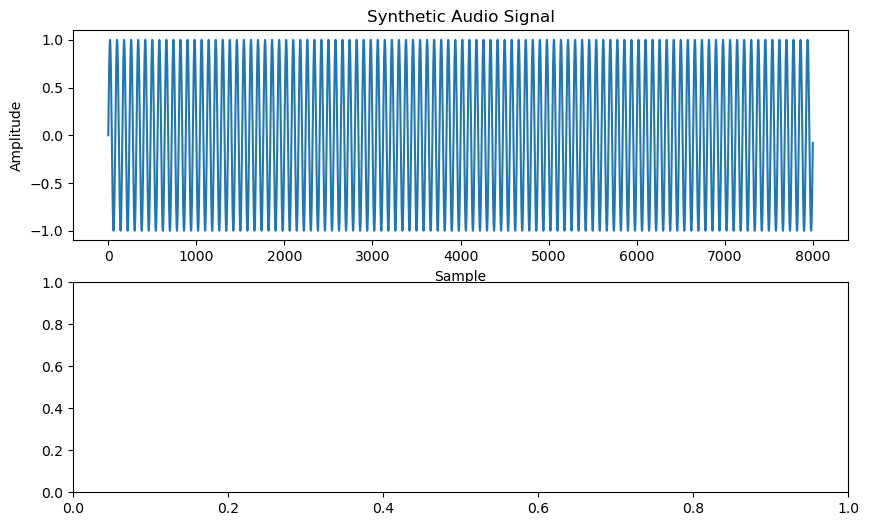

In [7]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def generate_audio_signal(fs, duration, f0):
    """
    Generate a synthetic audio signal.
    
    Args:
    - fs: Sampling frequency (Hz)
    - duration: Duration of the signal (seconds)
    - f0: Fundamental frequency (Hz)
    
    Returns:
    - signal: Synthetic audio signal (1D numpy array)
    """
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * f0 * t)
    return signal

def autocorrelation_method(signal, order):
    """
    Estimate LPC coefficients using autocorrelation method.
    
    Args:
    - signal: input speech signal (1D numpy array)
    - order: LPC order (integer)
    
    Returns:
    - lpc_coeffs: LPC coefficients (1D numpy array)
    """
    # Compute autocorrelation coefficients
    R = np.correlate(signal, signal, mode='full')
    
    # Keep only positive lags
    R = R[len(R)//2:]
    
    # Create toeplitz matrix
    R_toeplitz = np.array([R[i:i+order] for i in range(order)])
    
    # Compute autocorrelation vector
    r = R[1:order+1]
    
    # Solve the normal equations to obtain LPC coefficients
    lpc_coeffs = np.linalg.solve(R_toeplitz, -r)
    
    return np.concatenate([[1], lpc_coeffs])

# Parameters
fs = 8000  # Sampling frequency (Hz)
duration = 1  # Duration of the signal (seconds)
f0 = 100  # Fundamental frequency of the signal (Hz)
order = 10  # LPC order

# Generate synthetic audio signal
signal = generate_audio_signal(fs, duration, f0)

# Apply LPC
lpc_coeffs = autocorrelation_method(signal, order)---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[6], line 34
     26     return speaker_predictions
     28 # Example usage:
     29 # Assuming you have LPCC features stored in 'lpcc_features' and corresponding speaker labels stored in 'speaker_labels'
     30 # lpcc_features is a 2D numpy array where each row contains LPCC coefficients for a speech segment
     31 # speaker_labels is a 1D numpy array containing the speaker identity for each speech segment
     32 
     33 # Train GMM models
---> 34 gmm_models = train_gmm_models(lpcc_features, speaker_labels)
     36 # Predict speaker identity
     37 predicted_speakers = predict_speaker(lpcc_features, gmm_models)

NameError: name 'lpcc_features' is not defined

# Plot the signal and LPC spectrum
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Synthetic Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
w, h = signal.freqz(1, lpc_coeffs, worN=fs)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('LPC Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.tight_layout()
plt.show()

print("LPC coefficients:", lpc_coeffs)


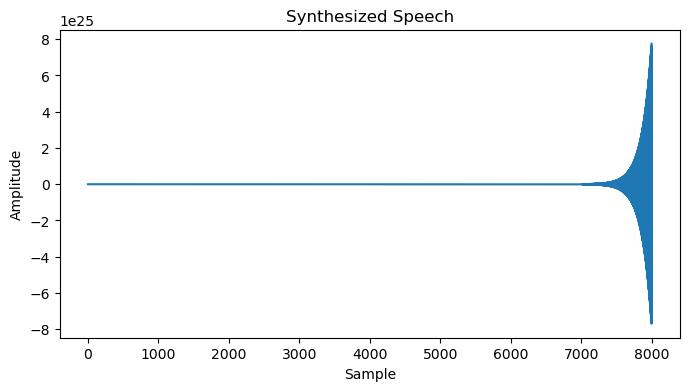

In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# The rest of your code

def synthesise_from_lpc(lpc_coeffs, duration, fs):
    """
    Synthesize speech from LPC coefficients.
    
    Args:
    - lpc_coeffs: LPC coefficients (1D numpy array)
    - duration: Duration of the synthesized speech (seconds)
    - fs: Sampling frequency (Hz)
    
    Returns:
    - synthesized_signal: Synthesized speech signal (1D numpy array)
    """
    # Generate white noise
    noise = np.random.normal(0, 1, int(fs * duration))
    
    # Filter the noise through LPC system
    synthesized_signal = signal.lfilter([1], lpc_coeffs, noise)
    
    return synthesized_signal

# Synthesize speech from LPC coefficients
synthesized_signal = synthesise_from_lpc(lpc_coeffs, duration, fs)

# Plot the synthesized signal
plt.figure(figsize=(8, 4))
plt.plot(synthesized_signal)
plt.title('Synthesized Speech')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


In [9]:
from IPython.display import Audio

# Play the synthesized speech
Audio(synthesized_signal, rate=fs)


In [10]:
from scipy.io import wavfile

# Save the synthesized speech to a WAV file
wavfile.write('synthesized_speech.wav', fs, synthesized_signal)


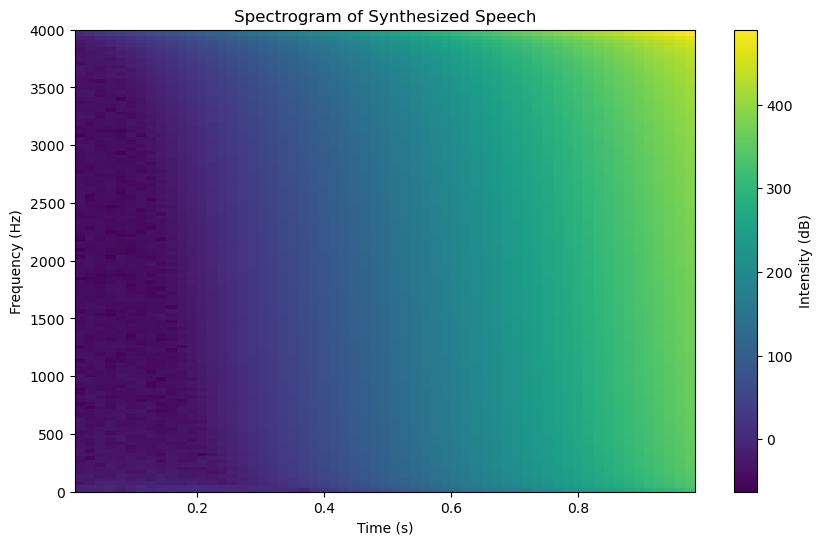

Estimated Formants (Hz): []


In [14]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to compute spectrogram
def plot_spectrogram(signal, fs):
    plt.figure(figsize=(10, 6))
    plt.specgram(signal, Fs=fs, NFFT=256, cmap='viridis')
    plt.title('Spectrogram of Synthesized Speech')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Intensity (dB)')
    plt.show()

# Function to estimate formants
def estimate_formants(lpc_coeffs, fs):
    # Compute the frequency response of LPC filter
    w, h = signal.freqz(1, lpc_coeffs, worN=fs)
    # Convert frequency response to magnitude in dB
    mag_dB = 20 * np.log10(np.abs(h))
    # Find peaks in magnitude response
    peaks, _ = signal.find_peaks(mag_dB, height=np.max(mag_dB)-50)
    # Convert peak indices to frequencies
    formants_hz = w[peaks] * (fs / (2 * np.pi))
    return formants_hz

# Plot spectrogram of synthesized speech
plot_spectrogram(synthesized_signal, fs)

# Estimate formants from LPC coefficients
formants_hz = estimate_formants(lpc_coeffs, fs)
print("Estimated Formants (Hz):", formants_hz)
